Here's the problem: I apply cuts similar to Y3 but the residuals (especially size residuals) are too large for the DELVE data

Find out why

In [89]:
%matplotlib notebook
import matplotlib.pyplot as pl
from astropy.io import fits
#import galsim
import numpy as np
from os import listdir
import random

In [5]:
#histogram of model and star sizes
#both ngmix and hsm get the same size, essentially


In [53]:
rootz = '/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/z_bands_with_blacklist/'
allzbands = listdir(rootz)
T_star = np.array([])
T_model = np.array([])
T_star_hsm = np.array([])
T_model_hsm = np.array([])
for fname in allzbands:
    f=fits.open(rootz+fname)
    T_star = np.append(T_star,f[1].data['T_star'])
    T_model = np.append(T_model,f[1].data['T_model'])
    T_star_hsm = np.append(T_star_hsm,f[1].data['T_star_hsm'])
    T_model_hsm = np.append(T_model_hsm,f[1].data['T_model_hsm'])

<IPython.core.display.Javascript object>


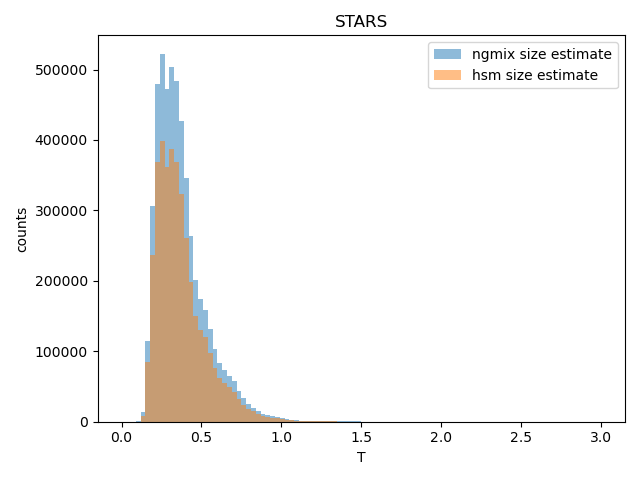

<IPython.core.display.Javascript object>


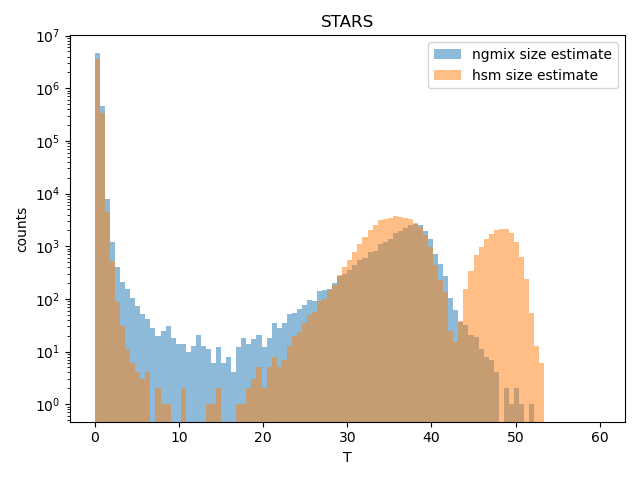

<IPython.core.display.Javascript object>


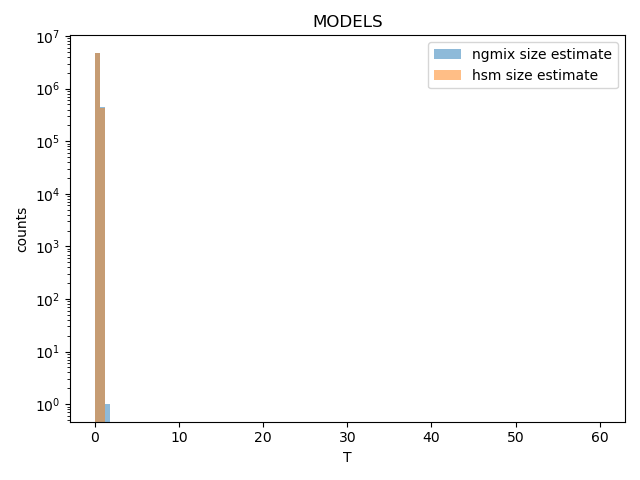

In [56]:
pl.figure()
pl.title('STARS')
pl.hist(T_star,bins=100,range=[0,3],alpha=0.5,label='ngmix size estimate')
pl.hist(T_star_hsm,bins=100,range=[0,3],alpha=0.5,label='hsm size estimate')
pl.legend(loc=0)
pl.xlabel('T')
pl.ylabel('counts')
#pl.axhline(y=0.01,ls='--',color='k')
#pl.axhline(y=-0.01,ls='--',color='k')
pl.tight_layout()
pl.show()

pl.figure()
pl.title('STARS')
pl.hist(T_star,bins=100,range=[0,60],alpha=0.5,label='ngmix size estimate')
pl.hist(T_star_hsm,bins=100,range=[0,60],alpha=0.5,label='hsm size estimate')
pl.legend(loc=0)
pl.xlabel('T')
pl.ylabel('counts')
pl.yscale('log')
pl.tight_layout()
pl.show()

pl.figure()
pl.title('MODELS')
pl.hist(T_model,bins=100,range=[0,60],alpha=0.5,label='ngmix size estimate')
pl.hist(T_model_hsm,bins=100,range=[0,60],alpha=0.5,label='hsm size estimate')
pl.legend(loc=0)
pl.xlabel('T')
pl.ylabel('counts')
pl.yscale('log')
pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


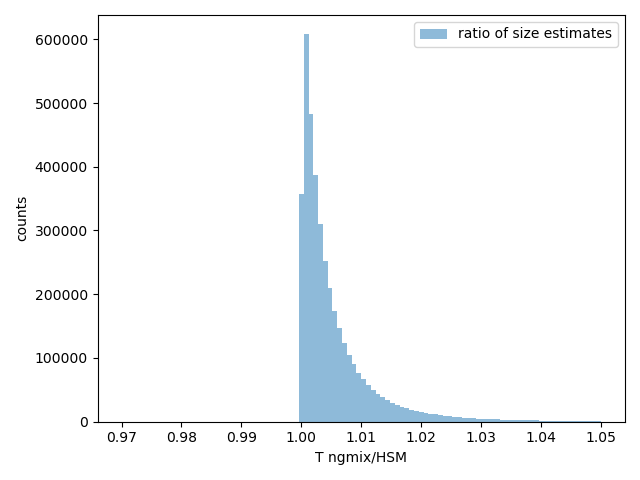

In [48]:
pl.figure()
pl.hist((T_star/T_star_hsm)[~np.isnan(T_star/T_star_hsm)],bins=100,range=[0.97,1.05],alpha=0.5,label='ratio of size estimates')
pl.legend(loc=0)
pl.xlabel('T ngmix/HSM')
pl.ylabel('counts')
#pl.axhline(y=0.01,ls='--',color='k')
#pl.axhline(y=-0.01,ls='--',color='k')
pl.tight_layout()
pl.show()

There are some cases where the star size measured is enormous (T>10,20,30...)

Find which exposures show that kind of shit

In [64]:
rootz = '/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/z_bands_with_blacklist/'
allzbands = listdir(rootz)
meanstarsize = np.array([])
meanstarsize_hsm = np.array([])
for fname in allzbands:
    f=fits.open(rootz+fname)
    ngmix_mean = np.nanmean(f[1].data['T_star'])
    hsm_mean = np.nanmean(f[1].data['T_star_hsm'])
    meanstarsize = np.append(meanstarsize,ngmix_mean)
    meanstarsize_hsm = np.append(meanstarsize_hsm,hsm_mean)
    if ngmix_mean>5.0:
        print(fname, 'from ngmix is horrible')
    if hsm_mean>5.0:
        print(fname, 'from hsm is horrible')

<ipython-input-64-7f8d2b764483>:7: RuntimeWarning: Mean of empty slice
  ngmix_mean = np.nanmean(f[1].data['T_star'])
<ipython-input-64-7f8d2b764483>:8: RuntimeWarning: Mean of empty slice
  hsm_mean = np.nanmean(f[1].data['T_star_hsm'])


zband_exp1015974.fits.fz from hsm is horrible
zband_exp932119.fits.fz from hsm is horrible
zband_exp511975.fits.fz from hsm is horrible
zband_exp431641.fits.fz from hsm is horrible
zband_exp640670.fits.fz from ngmix is horrible
zband_exp640670.fits.fz from hsm is horrible
zband_exp830026.fits.fz from ngmix is horrible
zband_exp830026.fits.fz from hsm is horrible
zband_exp302046.fits.fz from hsm is horrible
zband_exp824806.fits.fz from hsm is horrible
zband_exp932054.fits.fz from hsm is horrible
zband_exp807451.fits.fz from hsm is horrible
zband_exp826633.fits.fz from hsm is horrible
zband_exp807436.fits.fz from hsm is horrible
zband_exp826597.fits.fz from hsm is horrible
zband_exp830031.fits.fz from ngmix is horrible
zband_exp830031.fits.fz from hsm is horrible
zband_exp825228.fits.fz from hsm is horrible
zband_exp872520.fits.fz from hsm is horrible
zband_exp826554.fits.fz from hsm is horrible
zband_exp548186.fits.fz from hsm is horrible
zband_exp829994.fits.fz from hsm is horrible
zba

In [63]:
pl.figure()
pl.hist(meanstarsize,bins=100,range=[0,10],alpha=0.5,label='mean size of ngmix exposures')
pl.hist(meanstarsize_hsm,bins=100,range=[0,10],alpha=0.5,label='mean size of hsm exposures')
pl.legend(loc=0)
pl.xlabel('mean of ngmix or HSM exposures')
pl.ylabel('counts')
#pl.axhline(y=0.01,ls='--',color='k')
#pl.axhline(y=-0.01,ls='--',color='k')
pl.yscale('log')
pl.title('mean sizes across exposures')
pl.tight_layout()

pl.show()

<IPython.core.display.Javascript object>

The fact that the mean size over an exposure is much less extreme (though still bad) than the mean size histograms themselves is telling me that there are some individual CCDS that are REALLY bad. Or worse, that there are individual stars that are REALLY bad that might be scattered over different CCDS.

Look at a single exposure that was deemed bad (mean size above 5)

In [66]:
f=fits.open(rootz+'zband_exp830026.fits.fz')
f.info()

Filename: /Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/z_bands_with_blacklist/zband_exp830026.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     52   2740R x 20C   [e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, e]   


<IPython.core.display.Javascript object>


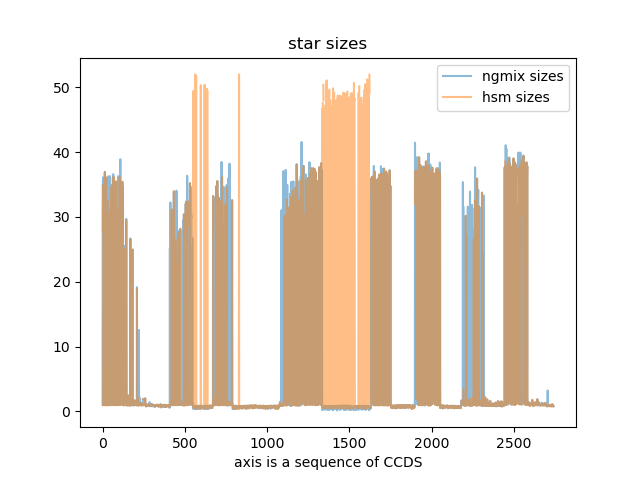

<IPython.core.display.Javascript object>


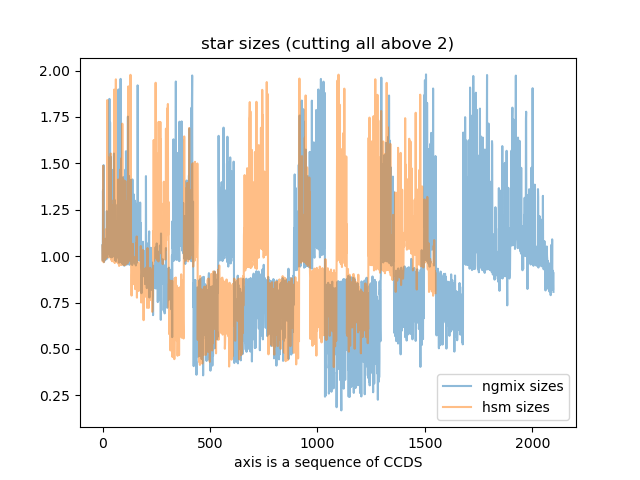

<IPython.core.display.Javascript object>


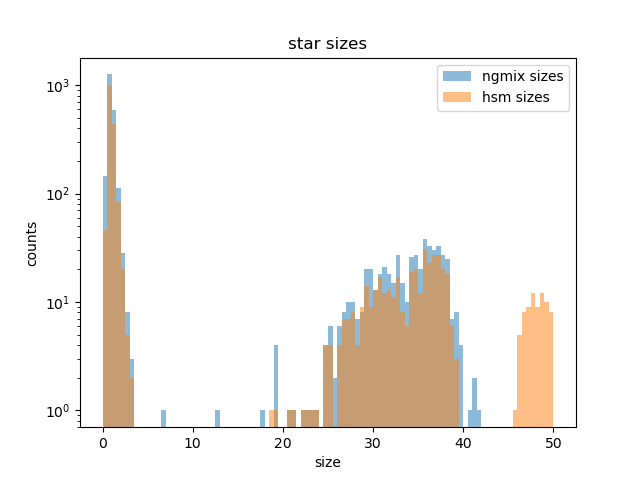

In [81]:
pl.figure()
pl.plot(f[1].data['T_star'],alpha=0.5,label='ngmix sizes')
pl.plot(f[1].data['T_star_hsm'],alpha=0.5,label='hsm sizes')
pl.title('star sizes')
pl.xlabel('axis is a sequence of CCDS')
pl.legend(loc=0)
pl.show()

pl.figure()
pl.plot(f[1].data['T_star'][f[1].data['T_star']<2],alpha=0.5,label='ngmix sizes')
pl.plot(f[1].data['T_star_hsm'][f[1].data['T_star_hsm']<2],alpha=0.5,label='hsm sizes')
pl.title('star sizes (cutting all above 2)')
pl.xlabel('axis is a sequence of CCDS')
pl.legend(loc=0)
pl.show()

pl.figure()
pl.hist(f[1].data['T_star'],bins=100,range=[0,50],alpha=0.5,label='ngmix sizes')
pl.hist(f[1].data['T_star_hsm'],bins=100,range=[0,50],alpha=0.5,label='hsm sizes')
pl.title('star sizes')
pl.xlabel('size')
pl.ylabel('counts')
pl.legend(loc=0)
pl.yscale('log')
pl.show()

Now, is this happening to every exposure (eg there's always a few bad CCDS everywhere), or is it just a few exposures that have some bad apples in them?

<IPython.core.display.Javascript object>


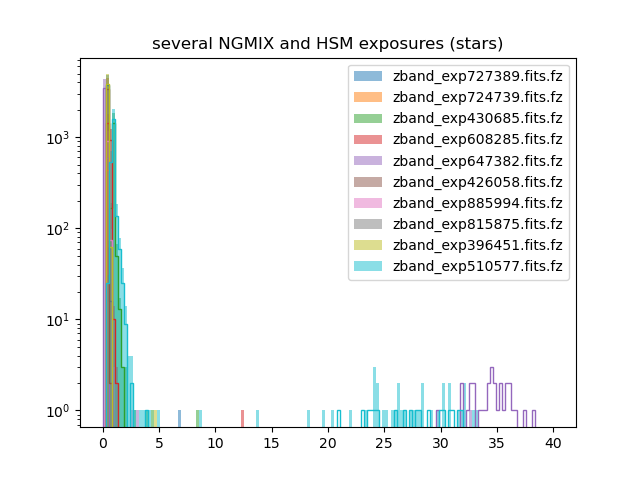

<IPython.core.display.Javascript object>


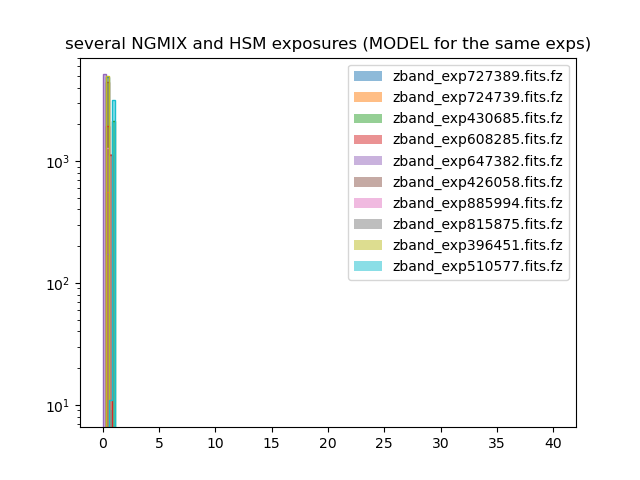

<IPython.core.display.Javascript object>


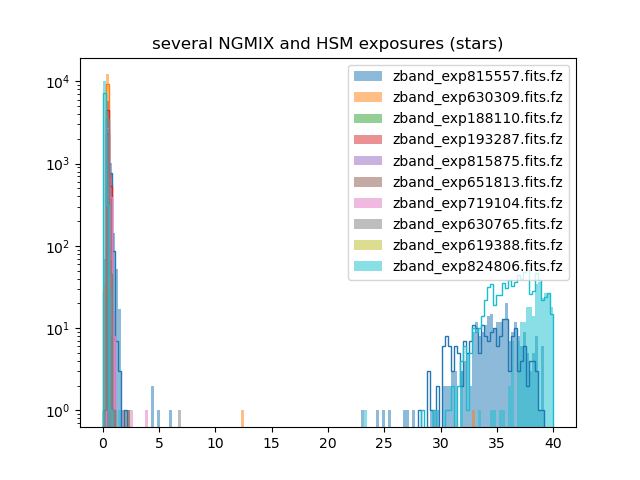

<IPython.core.display.Javascript object>


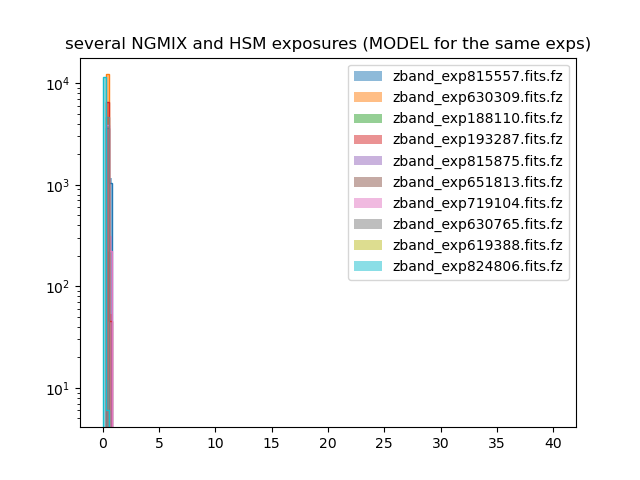

In [108]:
rootz = '/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/z_bands_with_blacklist/'
allzbands = listdir(rootz)
meanstarsize = np.array([])
meanstarsize_hsm = np.array([])
pl.figure()
random.shuffle(allzbands)
for i,fname in enumerate(allzbands[0:10]):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_star'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_star_hsm'],bins=150,range=[0,40],histtype='step',color=color)
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (stars)')
pl.show()

pl.figure()
for i,fname in enumerate(allzbands[0:10]):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_model'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_model_hsm'],bins=150,range=[0,40],histtype='step',color=color)
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (MODEL for the same exps)')
pl.show()

pl.figure()
random.shuffle(allzbands)
for i,fname in enumerate(allzbands[0:10]):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_star'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_star_hsm'],bins=150,range=[0,40],histtype='step',color=color)
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (stars)')
pl.show()

pl.figure()
for i,fname in enumerate(allzbands[0:10]):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_model'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_model_hsm'],bins=150,range=[0,40],histtype='step',color=color)
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (MODEL for the same exps)')
pl.show()

Picked some particularly bad ones and will inspect them more carefully:

<IPython.core.display.Javascript object>


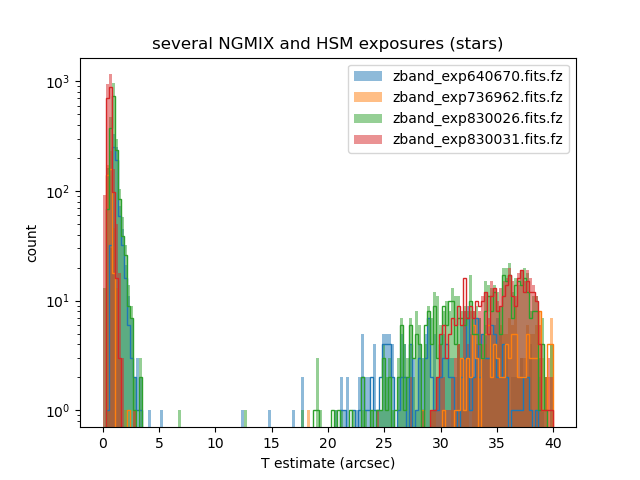

In [250]:
pl.figure()
des = fits.open('../DES_PSF_catalogs/psf_y1a1-v13.fits')
for i,fname in enumerate(['zband_exp640670.fits.fz','zband_exp736962.fits.fz',
                          'zband_exp830026.fits.fz','zband_exp830031.fits.fz']):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_star'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_star_hsm'],bins=150,range=[0,40],histtype='step',color=color)
#pl.hist(des[1].data['psf_size'],bins=150,range=[0,40],color='k',label='DES')
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (stars)')
pl.xlabel('T estimate (arcsec)')
pl.ylabel('count')
pl.show()



In [121]:
#start with exp80031
ccddir = '/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/exp830031/'
ccdnames = listdir(ccddir)
for ccdname in ccdnames:
    f=fits.open(ccddir+ccdname)
    print(ccdname,'has a mean  NGMIX star size of',np.nanmean(f[1].data['T_star']))

zD00830031_z_c56_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 0.37222317
zD00830031_z_c37_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 0.5156049
zD00830031_z_c44_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 0.48837852
zD00830031_z_c25_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 0.90817344
zD00830031_z_c13_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 13.745762
zD00830031_z_c18_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 8.959264
zD00830031_z_c01_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 16.928793
zD00830031_z_c60_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 0.39542148
zD00830031_z_c07_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 14.9930315
zD00830031_z_c15_r5665p01_immasked.fits.fz_.fits.fz has a mean  NGMIX star size of 11.018559
zD00830031_z_c49_r5665p01_immasked.fits.fz_.fits.fz has a mean  NG

In [242]:
f=fits.open(ccddir+'zD00830031_z_c06_r5665p01_immasked.fits.fz_.fits.fz')
f[1].data['T_star']

array([ 0.94888926, 39.92324   ,  0.63808006, 38.53525   ,  0.71874684,
       36.99312   , 38.72181   ,  0.5940249 , 39.785614  ,  0.5661615 ,
        1.0990539 , 33.401356  , 34.747948  ,  0.7921612 , 37.32768   ,
       36.554977  , 34.069996  ,  0.714184  , 35.297024  , 38.998363  ,
        0.5748036 ,  0.6045452 ,  0.9030876 ,  0.64015985, 37.846825  ,
       39.439045  ,  0.5597894 , 35.82921   , 34.20664   ,  0.84251386,
       40.327488  ,  0.70129544,  0.6641988 , 38.800716  ,  0.967038  ,
       38.45283   ,  0.6283579 ,  0.55302566,  0.61502075, 35.041687  ,
        0.659163  ,  0.5823952 ,  0.590857  , 33.728672  ,  0.6355637 ,
       38.40814   ,  1.0469365 ,  0.5984041 ,  0.60530865, 38.722446  ,
       38.950455  ,  0.56096524,         nan,  0.58025837,  0.6850216 ,
        0.71489346, 38.303482  ,  0.72236544,  0.63174045, 35.054047  ,
        1.023808  ,  0.581949  ,  0.5794724 , 38.663986  ,  0.7525934 ,
        0.65032554,  0.87861955,  0.80839   , 38.73185   , 36.14

In [223]:
pl.figure()
CMAP='viridis'
pl.subplot(311)
im = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/z/D00830031_z_c06_r5665p01_immasked.fits.fz')       
pl.title('SCI')
pl.imshow(np.arcsinh(im['sci'].data.T),cmap=CMAP)
pl.colorbar()
pl.subplot(312)
pl.title('WGT')
pl.imshow(np.log10(im['wgt'].data.T),cmap=CMAP)
pl.colorbar()
pl.subplot(313)
pl.title('MSK')
pl.imshow(np.log10(im['msk'].data.T),cmap=CMAP)
pl.colorbar()
pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>

<ipython-input-223-9b5cd7fbf45c>:10: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(im['wgt'].data.T),cmap=CMAP)
<ipython-input-223-9b5cd7fbf45c>:14: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(im['msk'].data.T),cmap=CMAP)


<IPython.core.display.Javascript object>


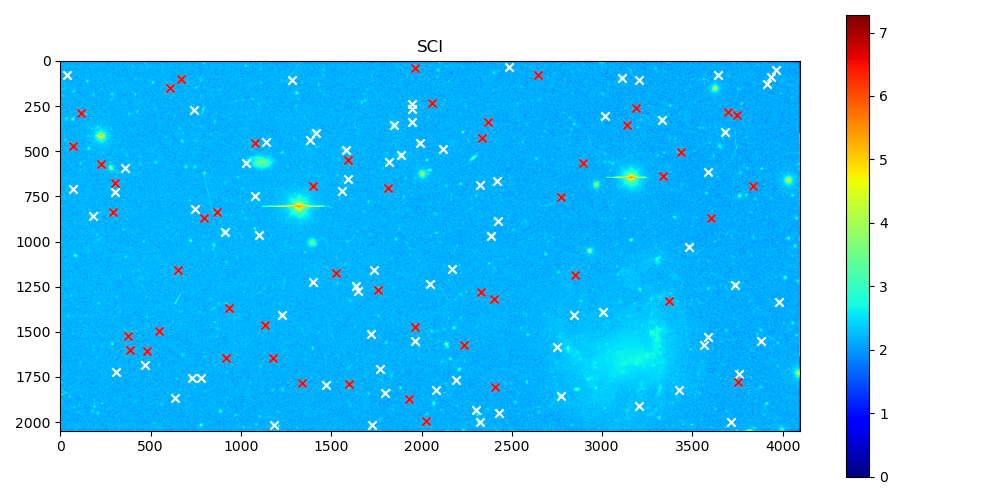

median of image: 201.78018


<IPython.core.display.Javascript object>


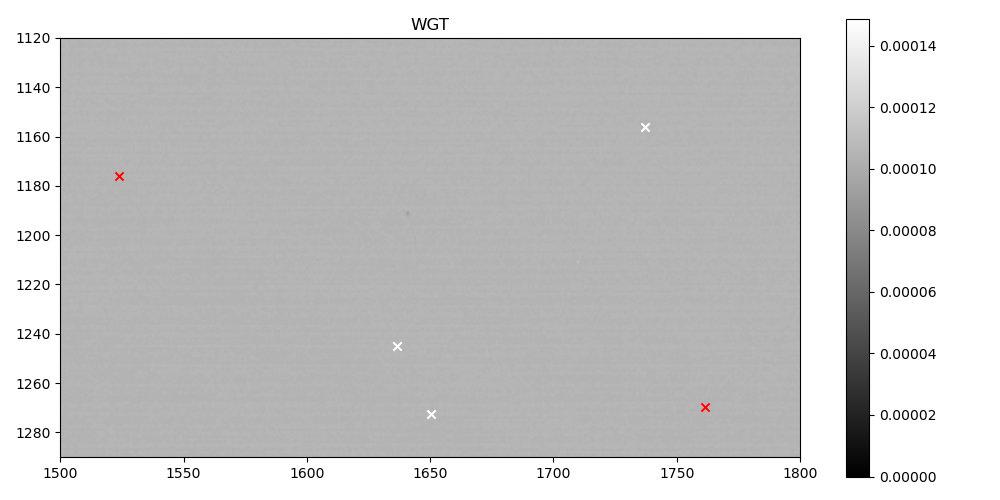

<IPython.core.display.Javascript object>


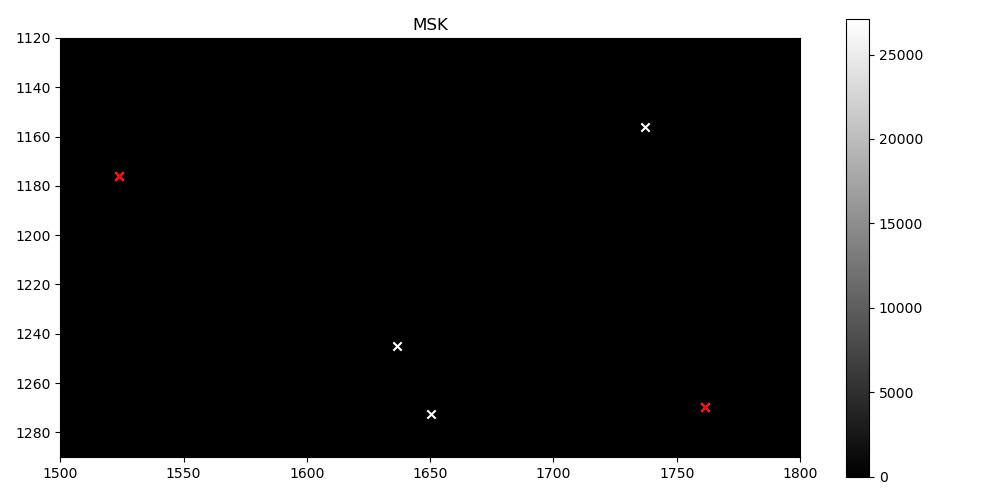

In [437]:
f=fits.open(ccddir+'zD00830031_z_c06_r5665p01_immasked.fits.fz_.fits.fz')
f[1].data['T_star']

pl.figure(figsize=(10,5))
CMAP='jet'
im = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/z/D00830031_z_c06_r5665p01_immasked.fits.fz')       
pl.title('SCI')
dat = im['sci'].data
print('median of image:',np.median(dat))
weird = np.where(f[1].data['T_star']>30.0)[0]
dat[dat<1]=1
pl.imshow(np.log10(dat.T),cmap=CMAP)
pl.colorbar()
pl.scatter(f[1].data['pix_y'],f[1].data['pix_x'],marker='x',color='w')
pl.scatter(f[1].data['pix_y'][weird],f[1].data['pix_x'][weird],marker='x',color='r')
#pl.xlim(1500,1800)
#pl.ylim(1290,1120)
pl.tight_layout()
pl.show()

pl.figure(figsize=(10,5))
CMAP='gist_gray'
im = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/z/D00830031_z_c06_r5665p01_immasked.fits.fz')       
pl.title('WGT')
dat = im['wgt'].data
weird = np.where(f[1].data['T_star']>30.0)[0]
#dat[dat<1]=1
pl.imshow(np.arcsinh(dat.T),cmap=CMAP)
pl.colorbar()
pl.scatter(f[1].data['pix_y'],f[1].data['pix_x'],marker='x',color='w')
pl.scatter(f[1].data['pix_y'][weird],f[1].data['pix_x'][weird],marker='x',color='r')
pl.xlim(1500,1800)
pl.ylim(1290,1120)
pl.tight_layout()
pl.show()

pl.figure(figsize=(10,5))
CMAP='gist_gray'
im = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/z/D00830031_z_c06_r5665p01_immasked.fits.fz')       
pl.title('MSK')
dat = im['msk'].data
weird = np.where(f[1].data['T_star']>30.0)[0]
#dat[dat<1]=1
pl.imshow(dat.T,cmap=CMAP)
pl.colorbar()
pl.scatter(f[1].data['pix_y'],f[1].data['pix_x'],marker='x',color='w')
pl.scatter(f[1].data['pix_y'][weird],f[1].data['pix_x'][weird],marker='x',color='r')
pl.xlim(1500,1800)
pl.ylim(1290,1120)
pl.tight_layout()
pl.show()

red crosses above correspond to stars whose measured T is >30 arcsec...

is the model well behaved in these cases?

In [236]:
f[1].data['g1_star']

array([-0.05502601, -0.02381052, -0.07582963,  0.00717637, -0.08839053,
       -0.00765381,  0.00516393, -0.0703672 , -0.01219044, -0.09024251,
       -0.09921456, -0.00587362,  0.0131107 , -0.10319454,  0.00938575,
        0.00158985,  0.00662399, -0.08409624,  0.0150252 ,  0.01395901,
       -0.0934929 , -0.09248679, -0.09135197, -0.08144473, -0.00212957,
        0.04896774, -0.09126673, -0.01078259, -0.02650773, -0.07797521,
       -0.03167954, -0.09671919, -0.08373289, -0.01109791, -0.10894294,
       -0.01328486, -0.07396843, -0.08771574, -0.10058179,  0.0016518 ,
       -0.08210448, -0.09610122, -0.08710773, -0.00052053, -0.10485884,
       -0.01999328, -0.07608428, -0.08832137, -0.08198939,  0.02426259,
       -0.12378725, -0.07640423,         nan, -0.07110944, -0.08510655,
       -0.06709438, -0.05130514, -0.08958229, -0.09520019,  0.01091284,
       -0.10548432, -0.08656044, -0.08056918, -0.01685568, -0.09907832,
       -0.11394829, -0.11885846, -0.15123358, -0.01064685, -0.01

Plot size vs mag

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


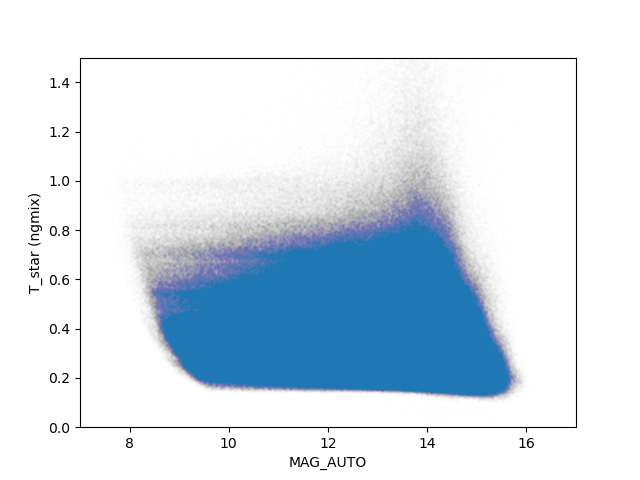

<IPython.core.display.Javascript object>


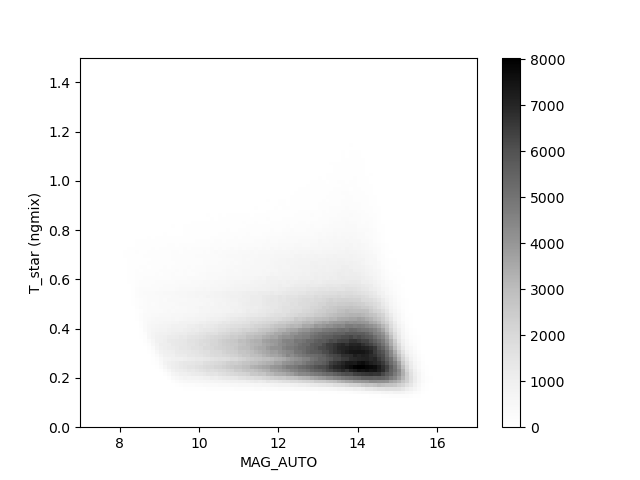

In [282]:
allz = fits.open('../measurements/zband_996exps.fits.fz')
nonanT = ~np.isnan(allz[1].data['T_star'])
nonanM = ~np.isnan(allz[1].data['MAG_AUTO'])
nonan = nonanM*nonanT


pl.figure()
pl.scatter(allz[1].data['MAG_AUTO'][nonan],allz[1].data['T_star'][nonan],s=2,alpha=0.02,edgecolors=None)
pl.ylabel('T_star (ngmix)')
pl.xlabel('MAG_AUTO')
pl.show()

pl.figure()
pl.scatter(allz[1].data['MAG_AUTO'][nonan],allz[1].data['T_star'][nonan],s=2,alpha=0.002,edgecolors=None)
pl.ylabel('T_star (ngmix)')
pl.xlabel('MAG_AUTO')
pl.ylim(0,1.5)
pl.xlim(7,17)
pl.show()

pl.figure()
pl.hist2d(allz[1].data['MAG_AUTO'][nonan],allz[1].data['T_star'][nonan],bins=100,range=[[7,17],[0,1.5]],cmap='Greys')
pl.colorbar()
pl.ylabel('T_star (ngmix)')
pl.xlabel('MAG_AUTO')
pl.show()


<IPython.core.display.Javascript object>


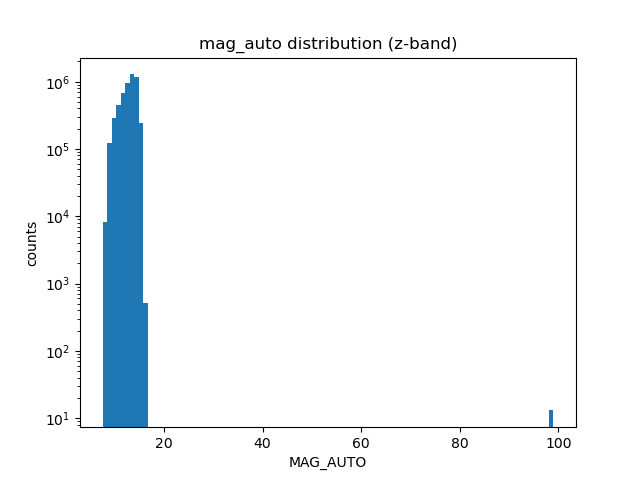

In [288]:
pl.figure()
pl.hist(allz[1].data['MAG_AUTO'],bins=100)
pl.xlabel('MAG_AUTO')
pl.ylabel('counts')
pl.yscale('log')
pl.title('mag_auto distribution (z-band)')
pl.show()

# chatting with Alex DW

In DES, all exposures were very uniform 90s and etc.

What I need is really a flux or S/N of stars, the magnitude is a calibrated quantity.

--> verify that mag_auto is -2.5xlog10(flux_auto) + 25

--> verify that the flux and S/N for the stars with T>30 is lower than most reasonable stars. If S/N of these stars is too small (say 10 or 20, but can check with the Y3 paper). In other words, check what is the range of S/N   of the PSF stars (minimum S/N should be 20, checked in Morganson et al).
 
--> S/N is simply FLUX_AUTO / FLUX_ERROR

--> the flux I want is f[2].data['FLUX_APER'][1][6]/f[2].data['FLUXERR_APER'][1][6] (FLUX_APER_7) (why not FLUX_AUTO?) see https://arxiv.org/pdf/1801.03177.pdf#page=25

--> plot

In [430]:
# based on the above, start by matching again the PSF star location to the objects in the sextractor catalog:

f=fits.open(ccddir+'zD00830031_z_c06_r5665p01_immasked.fits.fz_.fits.fz')
cat = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/cat_z/D00830031_z_c06_r5665p01_red-fullcat.fits')
psf_x, psf_y = f[1].data['pix_x'],f[1].data['pix_y']
cat_x, cat_y = cat[2].data['X_image'], cat[2].data['Y_image']

stars_fluxaper = np.array([])
stars_SN = np.array([])
stars_SN_aper8 = np.array([])
stars_FWHM = np.array([])
stars_magauto = np.array([])
stars_fluxauto = np.array([])
stars_SNauto = np.array([])
stars_fluxradius = np.array([])
bad_index=np.nan
for i,x,y in zip(np.arange(len(psf_x)),psf_x, psf_y):
    xloc = np.isclose(x,cat_x,atol=1)
    yloc = np.isclose(y,cat_y,atol=1)
    loc = xloc*yloc
    if loc.sum()==1:
        loc= np.where(loc)[0].item()
        stars_fluxaper = np.append(stars_fluxaper,cat[2].data['FLUX_APER'][loc][6])
        stars_SN = np.append(stars_SN,cat[2].data['FLUX_APER'][loc][6]/cat[2].data['FLUXERR_APER'][loc][6])
        stars_SN_aper8 = np.append(stars_SN_aper8,cat[2].data['FLUX_APER'][loc][7]/cat[2].data['FLUXERR_APER'][loc][7])
        stars_FWHM = np.append(stars_FWHM, cat[2].data['FWHMPSF_IMAGE'][loc]*0.26)
        stars_magauto = np.append(stars_magauto, cat[2].data['MAG_AUTO'][loc])
        stars_fluxauto = np.append(stars_fluxauto, cat[2].data['FLUX_AUTO'][loc])
        stars_SNauto = np.append(stars_SNauto, cat[2].data['FLUX_AUTO'][loc]/cat[2].data['FLUXERR_AUTO'][loc])
        stars_fluxradius = np.append(stars_fluxradius, cat[2].data['FLUX_RADIUS'][loc])
    else:
        bad_index = i
        continue
    
'''
starlist = fits.open('/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/psf_z/D00830031_z_c06_r5665p01_psfex-starlist.fits')           
def match_star_to_cat(starlist,cat,pixeldistance=1.0):
    good_index = get_psf_stars_index(starlist)
    goodstars = starlist[2].data[good_index]
    #now get the X and Y CCD coordinates of each of the "good" stars
    X,Y = goodstars['x_image'],goodstars['y_image']
    Xcat,Ycat = cat[2].data['x_image'],cat[2].data['y_image'] 
    matched_star_indices=np.array([],dtype=int)
    match_fail=0
    for x,y in zip(X,Y):
        #will match stars in starlist by their X,Y position
        wherex,wherey = np.isclose(x,Xcat,atol=pixeldistance),np.isclose(y,Ycat,atol=pixeldistance)
        product = wherex*wherey
        if np.sum(product)!=1: 
            match_fail=match_fail+1
            continue
        else:
            matched_star_indices = np.append(matched_star_indices,np.where(product)[0])
    #print('Failed to find a match in the sextractor fullcat for %1.2f percent of the starlist stars'%(100*len(match_fail)/len(good_index)),flush=True)
    return matched_star_indices
def get_psf_stars_index(starlist):
    goodstars= np.where(starlist[2].data['flags_psf']==0)[0] 
    return goodstars

match_star_to_cat(starlist,cat)
'''



'\nstarlist = fits.open(\'/Users/secco/Documents/projects/SHEAR/shearcat/code/rowe_stats/measurements/problematic_exposures/cats_exp830031/psf_z/D00830031_z_c06_r5665p01_psfex-starlist.fits\')           \ndef match_star_to_cat(starlist,cat,pixeldistance=1.0):\n    good_index = get_psf_stars_index(starlist)\n    goodstars = starlist[2].data[good_index]\n    #now get the X and Y CCD coordinates of each of the "good" stars\n    X,Y = goodstars[\'x_image\'],goodstars[\'y_image\']\n    Xcat,Ycat = cat[2].data[\'x_image\'],cat[2].data[\'y_image\'] \n    matched_star_indices=np.array([],dtype=int)\n    match_fail=0\n    for x,y in zip(X,Y):\n        #will match stars in starlist by their X,Y position\n        wherex,wherey = np.isclose(x,Xcat,atol=pixeldistance),np.isclose(y,Ycat,atol=pixeldistance)\n        product = wherex*wherey\n        if np.sum(product)!=1: \n            match_fail=match_fail+1\n            continue\n        else:\n            matched_star_indices = np.append(matched_st

<IPython.core.display.Javascript object>


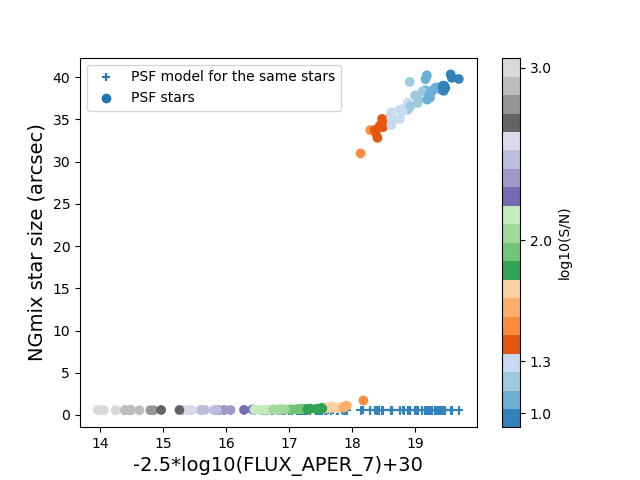

<IPython.core.display.Javascript object>


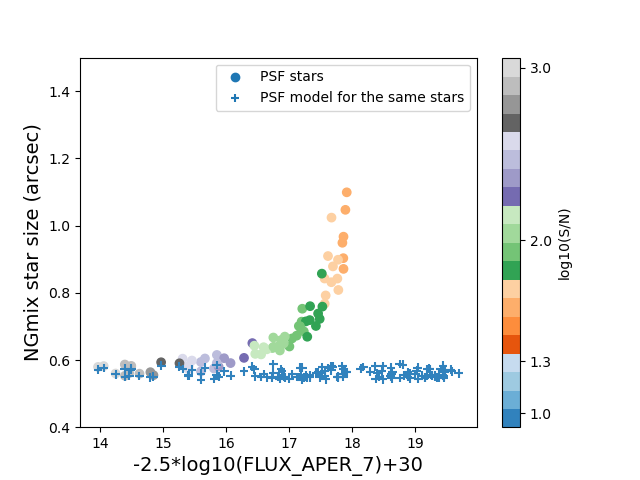

In [419]:
mymag=-2.5*np.log10(stars_fluxaper)+30
Tstar = np.delete(f[1].data['T_star'],bad_index)
Tmodel = np.delete(f[1].data['T_model'],bad_index)
pl.figure()
pl.xlabel('-2.5*log10(FLUX_APER_7)+30',fontsize=14)
pl.ylabel('NGmix star size (arcsec)',fontsize=14)
pl.scatter(mymag,Tmodel,marker='+',c=np.zeros(len(stars_SN)),cmap='tab20c',s=40,label='PSF model for the same stars')
pl.scatter(mymag,Tstar,c=np.log10(stars_SN),cmap='tab20c',label='PSF stars')
pl.colorbar(ticks=[0,1,1.3,2,3],label='log10(S/N)')
pl.legend(loc=0)
pl.show()
#ticks={0:'1',1:'10',1.3:'20',2:'100',3:'1000'}

pl.figure()
pl.xlabel('-2.5*log10(FLUX_APER_7)+30',fontsize=14)
pl.ylabel('NGmix star size (arcsec)',fontsize=14)
pl.scatter(mymag,Tstar,c=np.log10(stars_SN),cmap='tab20c',label='PSF stars')
pl.colorbar(ticks=[0,1,1.3,2,3],label='log10(S/N)')
pl.scatter(mymag,Tmodel,marker='+',c=np.zeros(len(stars_SN)),cmap='tab20c',s=40,label='PSF model for the same stars')
pl.legend(loc=0)
pl.ylim(0.4,1.5)
pl.show()
#ticks={0:'1',1:'10',1.3:'20',2:'100',3:'1000'}


<IPython.core.display.Javascript object>


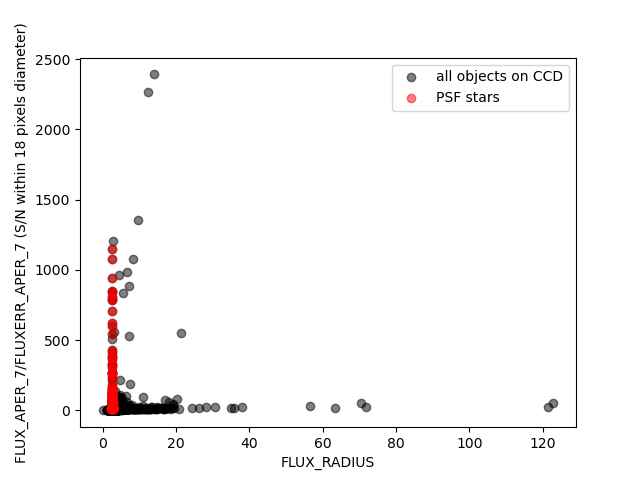

<IPython.core.display.Javascript object>


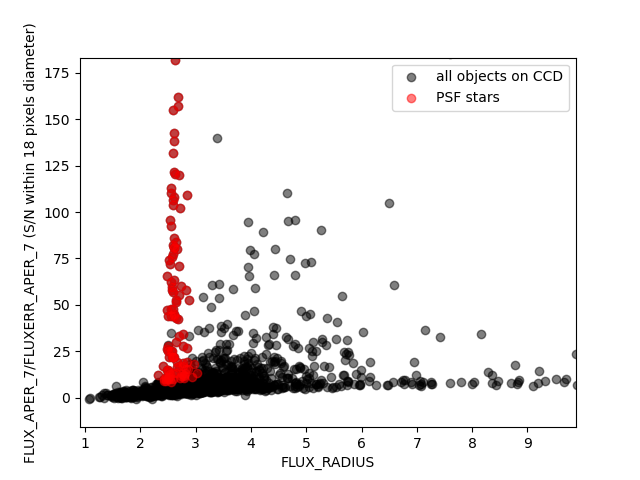

In [429]:
flux_radius_all = cat[2].data['flux_radius']
flux_aper_7_all = cat[2].data['flux_aper'][:,6]
fluxerr_aper_7_all = cat[2].data['fluxerr_aper'][:,6]

pl.figure()
pl.xlabel('FLUX_RADIUS')
pl.ylabel('FLUX_APER_7/FLUXERR_APER_7 (S/N within 18 pixels diameter)')
pl.scatter(flux_radius_all,flux_aper_7_all/fluxerr_aper_7_all,c='k',label='all objects on CCD',alpha=0.5)
pl.scatter(stars_fluxradius,stars_SN,c='r',alpha=0.5,label='PSF stars')
pl.legend(loc=0)
pl.show()

pl.figure()
pl.xlabel('FLUX_RADIUS')
pl.ylabel('FLUX_APER_7/FLUXERR_APER_7 (S/N within 18 pixels diameter)')
pl.scatter(flux_radius_all,flux_aper_7_all/fluxerr_aper_7_all,c='k',label='all objects on CCD',alpha=0.5)
pl.scatter(stars_fluxradius,stars_SN,c='r',alpha=0.5,label='PSF stars')
pl.legend(loc=0)
pl.show()


<IPython.core.display.Javascript object>


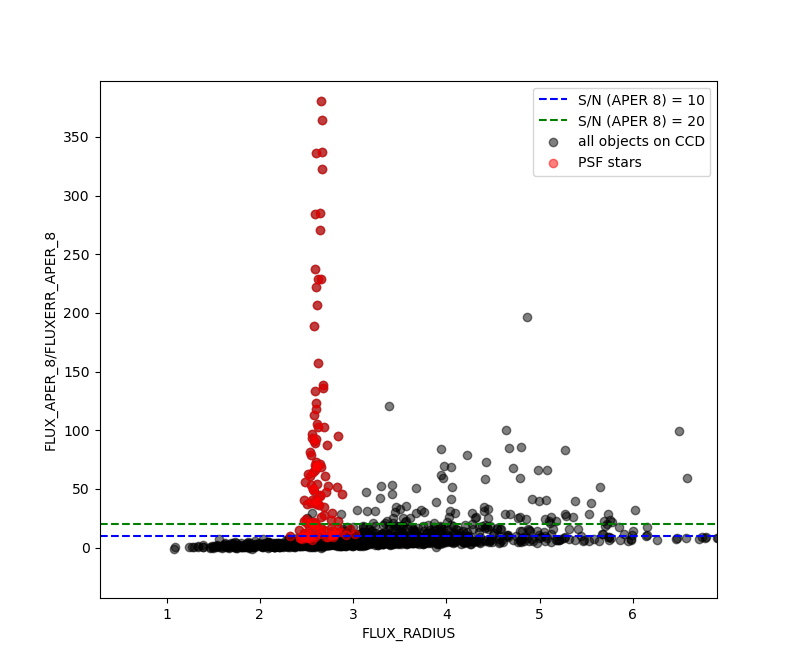

<IPython.core.display.Javascript object>


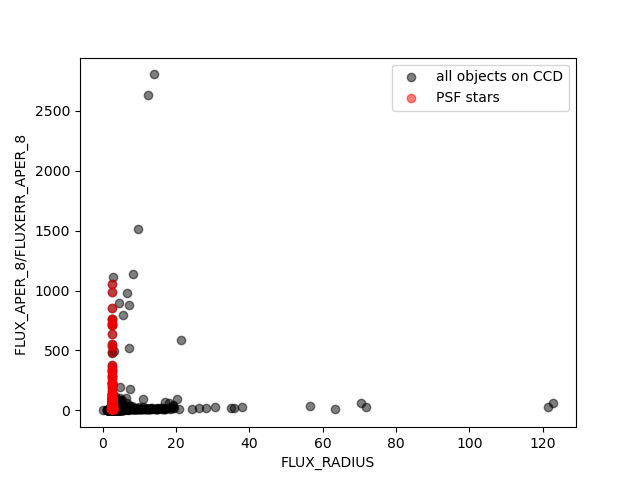

In [432]:
flux_radius_all = cat[2].data['flux_radius']
flux_aper_8_all = cat[2].data['flux_aper'][:,7]
fluxerr_aper_8_all = cat[2].data['fluxerr_aper'][:,7]

pl.figure()
pl.xlabel('FLUX_RADIUS')
pl.ylabel('FLUX_APER_8/FLUXERR_APER_8')
pl.scatter(flux_radius_all,flux_aper_8_all/fluxerr_aper_8_all,c='k',label='all objects on CCD',alpha=0.5)
pl.scatter(stars_fluxradius,stars_SN_aper8,c='r',alpha=0.5,label='PSF stars')
pl.axhline(y=10,color='b',ls='--',label='S/N (APER 8) = 10')
pl.axhline(y=20,color='g',ls='--',label='S/N (APER 8) = 20')
pl.legend(loc=0)
pl.show()

pl.figure()
pl.xlabel('FLUX_RADIUS')
pl.ylabel('FLUX_APER_8/FLUXERR_APER_8 ')
pl.scatter(flux_radius_all,flux_aper_8_all/fluxerr_aper_8_all,c='k',label='all objects on CCD',alpha=0.5)
pl.scatter(stars_fluxradius,stars_SN_aper8,c='r',alpha=0.5,label='PSF stars')
pl.legend(loc=0)
pl.show()


In [424]:
flux_aper_7_all = cat[2].data['flux_aper'][:,6]
flux_aper_7_all

array([3421427.2   ,   72741.836 ,   56535.69  , ...,    7624.8086,
         40556.61  ,    5296.439 ], dtype=float32)

<IPython.core.display.Javascript object>


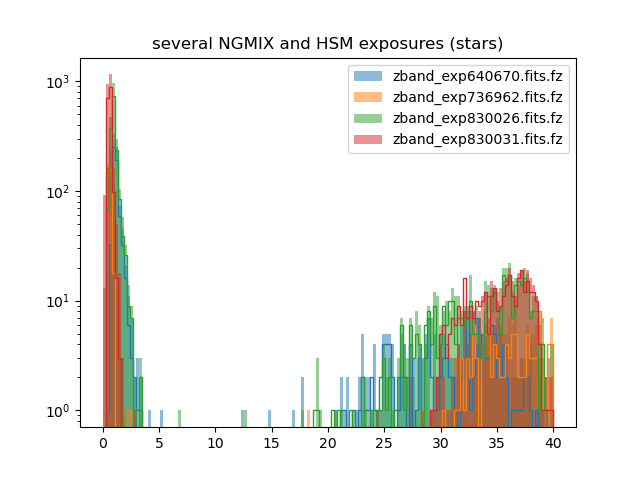

In [119]:
pl.figure()
for i,fname in enumerate(['zband_exp640670.fits.fz','zband_exp736962.fits.fz',
                          'zband_exp830026.fits.fz','zband_exp830031.fits.fz']):
    color='C'+str(i)
    f=fits.open(rootz+fname)
    pl.hist(f[1].data['T_star'],bins=150,range=[0,40],alpha=0.5,label=fname,color=color)
    pl.hist(f[1].data['T_star_hsm'],bins=150,range=[0,40],histtype='step',color=color)
pl.yscale('log')
pl.legend(loc=0)
pl.title('several NGMIX and HSM exposures (stars)')
pl.show()

In [368]:
a = np.arange(9)+3
np.delete(a,0)

array([ 4,  5,  6,  7,  8,  9, 10, 11])

In [394]:
cat[2].data['MAG_AUTO'] - (-2.5*np.log10(cat[2].data['FLUX_AUTO']))

<ipython-input-394-d932b8f5d333>:1: RuntimeWarning: invalid value encountered in log10
  cat[2].data['MAG_AUTO'] - (-2.5*np.log10(cat[2].data['FLUX_AUTO']))


array([25., 25., 25., ..., 25., 25., 25.], dtype=float32)

In [294]:
aper

README.md            exp720094/           test_figs/
code/                exp960200/
environments/        source_lucas_laptop


In [298]:
f=fits.open('../../../exp720094/cat_g/D00720094_g_c01_r3755p01_red-fullcat.fits')
f[2].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  718 / BYTES PER ROW                                  
NAXIS2  =                 1659 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                  101 / FIELDS PER ROWS                                
EXTNAME = 'LDAC_OBJECTS'       / TABLE NAME                                     
TTYPE1  = 'NUMBER  '           / Running object number                          
TFORM1  = '1J      '                                                            
TDISP1  = 'I10     '                                                            
TTYPE2  = 'FLAGS   '        

In [351]:
cat[2].data['fwhmpsf_world']

array([8.758163e-05, 8.756800e-05, 8.757764e-05, ..., 8.756423e-05,
       8.760267e-05, 8.754422e-05], dtype=float32)